In [ ]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
# import _pickle as pickle

from kaveh.behavioral import oculomotor
from kaveh.sorting import spikesorter
from kaveh.toolbox import find_file
from kaveh.plots import axvlines
import numpy as np
from matplotlib import pyplot as plt
from smr import File
import csv
import os

In [ ]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [ ]:
f_names= [
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K48/error_direction/K48_2_CSddirTuning.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K69/error_direction/K69_1_DirTuning.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K69/error_magnitude/K69_1_ErrorSize45degDir.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K16/error_direction/K16_2_directionaltest.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Step/S38/error_direction/S38_1_directionaltuning.smr',
          '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O62/O62_1_FW5R_BW5L_A.smr',
          '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O62/O62_1_pre.smr',
         ]
cs_spiketrain_idx = [ 1, 1, 2, 0, 1, 2, 0]


In [ ]:
f_id = 6
num_spike_train = cs_spiketrain_idx[f_id]

In [ ]:
cs_path = '/mnt/data/temp/kaveh/auto_processed/' 
cf = find_file(os.path.split(f_names[f_id])[1] + '.pkl', cs_path)
with open(cf, 'rb') as input:
    try:
        sss = pickle.load(input, encoding='latin1')
    except TypeError:
        sss = pickle.load(input)
# sss.voltage = voltage_chan.data

In [ ]:
from neo.io import Spike2IO
neo_reader = Spike2IO(filename=f_names[2])
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]
volt_1 = np.array(seg.analogsignals[-1])

In [ ]:
seg.analogsignals[-1]

In [ ]:
neo_reader = Spike2IO(filename=f_names[1])
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]
volt_2 = np.array(seg.analogsignals[-1])

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(0, volt_1[0:100000].size)*(1/50000.0), volt_1[0:100000], color='b', alpha=1)
# plt.plot(volt_2[0:100000], color='r', alpha=0.3)
plt.xlabel('Time (s)')

In [ ]:
25*(1.0/50000)

In [ ]:
cs_indices = np.array([])
for i in range(num_spike_train+1):
    cs_indices = np.union1d(cs_indices, np.array(seg.spiketrains[i]))

In [ ]:
cs_indices = np.int32(cs_indices/sss.dt)


In [ ]:
def construct_y(spike_indices, cs_indices):
    from kaveh.toolbox import closest_argmin
    cs = closest_argmin(cs_indices, spike_indices)
    labeled = np.zeros(spike_indices.shape)
    labeled[cs] = 1.0
    
    return labeled

In [ ]:
smr_content = File(f_names[f_id])
smr_content.read_channels()
voltage_chan = smr_content.get_channel(0)
sss.voltage = voltage_chan.data


In [ ]:
voltage_chan.data.shape

In [ ]:
spike_indices = sss.get_spike_indices()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(sss.voltage, alpha = 0.3, zorder = 1)
plt.eventplot(spike_indices, alpha = 0.5, linelengths=5000, color = 'r')
plt.eventplot(cs_indices, alpha = 0.5, linelengths=10000, color = 'g')

In [ ]:
from neo.io import Spike2IO
fn = f_names[5]
r = Spike2IO(filename=fn)

In [ ]:
seg = r.read_segment()

signal = seg.analogsignals[4].magnitude

In [ ]:
cs_path = '/mnt/data/temp/kaveh/auto_processed/' 
cf = find_file(os.path.split(fn)[1] + '.pkl', cs_path)
with open(cf, 'rb') as input:
    sss = pickle.load(input)

In [ ]:
sss.voltage = signal
spike_indices = sss.get_spike_indices()


In [ ]:
plt.figure(figsize=(20,5))
plt.plot(signal)
from kaveh.plots import axvlines
axvlines(plt.gca(), spike_indices, color = 'r', alpha = 0.3)

In [28]:
filename = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_preadapt.smr'
st_idx = 1

import numpy as np
from neo.io import Spike2IO
import matplotlib.pyplot as plt
neo_reader = Spike2IO(filename=filename)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]
asig = seg.analogsignals[-1]
volt = np.array(asig)
cs_indices = np.array(seg.spiketrains[st_idx])
cs_indices = np.int32(cs_indices/asig.sampling_period)


In [29]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


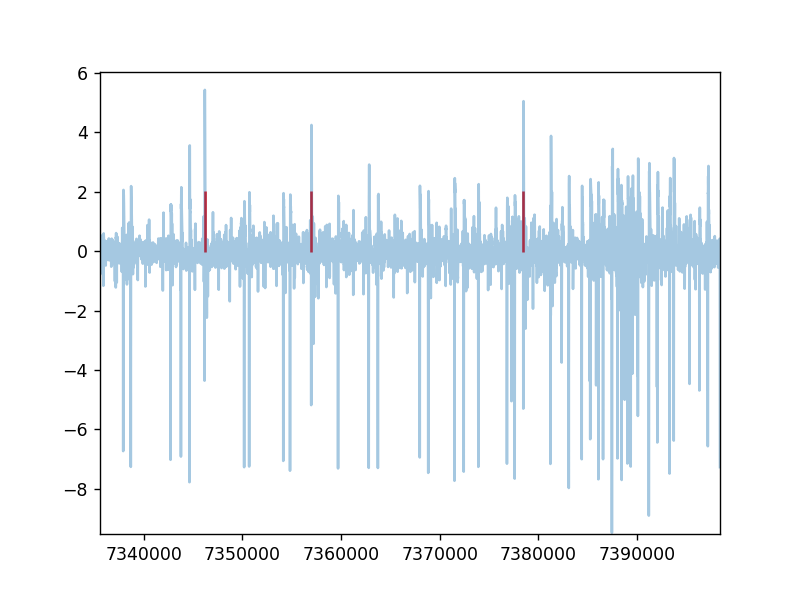

In [30]:
plt.figure()
plt.plot(volt, alpha = 0.4)
plt.eventplot(cs_indices,orientation='horizontal', linelengths = np.max(volt)/4.0, colors='r')
plt.show()

In [24]:
plt.eventplot(cs_indices,orientation='horizontal', linelengths = np.max(volt)/4.0, colors='k')

In [4]:
(volt.size*asig.sampling_period)/60

array(52.19188167) * 1/Hz

In [5]:
cs_indices.shape

(1432,)

In [11]:
def common_avg_ref(data, refrence, affected):
    signal_average = np.mean(data[refrence, :], axis = 0)
    data[affected,:] = data[affected,:] - signal_average
    
import scipy.signal
import scipy.fftpack
def notch_all_harmonics(signal, base_freq, sampling_rate):
    """
    Stoppass filter at the base_freq and all of its harmonics
    """
    if base_freq > sampling_rate/2.0:
        print('Invalid frequency to notch')
        return
    curr_freq = base_freq
    while curr_freq < sampling_rate/2.0:
        b, a = scipy.signal.iirnotch(curr_freq/(sampling_rate/2.0), 30)
        signal = scipy.signal.lfilter(b, a, signal)
        curr_freq = curr_freq + base_freq
        
    return signal
        

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    y = scipy.signal.lfilter(b, a, data)
    return y


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    y = scipy.signal.lfilter(b, a, data)
    return y


In [12]:

signal_lfp = butter_bandpass_filter(volt, 0.01, 300, 50000, order=2 )
